In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

students_df =pd.read_csv(r"C:\Users\91779\Downloads\students.csv")
course_activity_df = pd.read_csv(r"C:\Users\91779\Downloads\course_activity.csv")
feedback_df = pd.read_csv(r"C:\Users\91779\Downloads\feedback.csv")

students_df.to_csv('students_clean.csv', index=False)
course_activity_df.to_csv('course_activity_clean.csv', index=False)
feedback_df.to_csv('feedback_clean.csv', index=False)

Identify and handle missing, duplicate, or inconsistent data

The following steps were taken to prepare the data for analysis:
- Inspection of data structure and identification of issues
- Handling missing values and duplicates
- Converting date formats
- Validating data ranges and removing inconsistent records
- Creating clean datasets for further analysis

In [ ]:
def inspect_data(df, name):
    print(f"\n--- {name} ---")
    print("\nShape (Rows, Columns):", df.shape)
    print("\nColumn Names & Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSample Data:")
    print(df.head())
inspect_data(students_df, "Students Dataset")

In [4]:
inspect_data(course_activity_df, "Course Activity Dataset")


--- Course Activity Dataset ---

Shape (Rows, Columns): (659, 5)

Column Names & Data Types:
Student_ID                object
Course_ID                 object
Date                      object
Time_Spent_Minutes         int64
Completion_Percentage    float64
dtype: object

Missing Values:
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64

Sample Data:
  Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  05/01/2024                  90                  46.10
1       S001     DM101  28/01/2024                 155                  88.87
2       S001     UX303  28/01/2024                 177                  54.93
3       S002     PY202  03/02/2024                  45                  32.20
4       S002     UX303  15/03/2024                 119                  90.80


In [5]:
inspect_data(feedback_df, "Feedback Dataset")


--- Feedback Dataset ---

Shape (Rows, Columns): (80, 4)

Column Names & Data Types:
Student_ID       object
Course_ID        object
Rating            int64
Feedback_Text    object
dtype: object

Missing Values:
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64

Sample Data:
  Student_ID Course_ID  Rating       Feedback_Text
0       S057     UX303       2      Too fast-paced
1       S063     PY202       2  Loved the examples
2       S022     PY202       4     Could be better
3       S011     PY202       5   Needs improvement
4       S073     WD404       4     Could be better


Convert data types where necessary (e.g., dates, numeric fields)

In [6]:
# Convert 'Date' column to datetime format
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'], format='%d/%m/%Y')

# After conversion - verify the new type
print("After conversion:", course_activity_df['Date'].dtype)

# Display first few rows to confirm changes
print(course_activity_df.head())

After conversion: datetime64[ns]
  Student_ID Course_ID       Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202 2024-01-05                  90                  46.10
1       S001     DM101 2024-01-28                 155                  88.87
2       S001     UX303 2024-01-28                 177                  54.93
3       S002     PY202 2024-02-03                  45                  32.20
4       S002     UX303 2024-03-15                 119                  90.80


In [7]:
# Convert 'Enrolment_Date' to datetime format
students_df['Enrolment_Date'] = pd.to_datetime(students_df['Enrolment_Date'], format='%d/%m/%Y')

# After conversion - verify new data type
print("After conversion:", students_df['Enrolment_Date'].dtype)

# Display first few rows to confirm changes
print(students_df.head())

After conversion: datetime64[ns]
  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     2023-11-24
1       S002  Student_2   32   Other    Chennai     2023-02-27
2       S003  Student_3   28   Other     Mumbai     2023-01-13
3       S004  Student_4   25  Female  Bangalore     2023-05-21
4       S005  Student_5   24   Other      Delhi     2023-05-06


In [8]:
students_df       = students_df.drop_duplicates().reset_index(drop=True)
course_activity_df = course_activity_df.drop_duplicates().reset_index(drop=True)
feedback_df        = feedback_df.drop_duplicates().reset_index(drop=True)

In [9]:
print("Duplicates in students_df:", students_df.duplicated().sum())
print("Duplicates in feedback_df:", feedback_df.duplicated().sum())
print("Duplicates in course_activity_df:", course_activity_df.duplicated().sum())


Duplicates in students_df: 0
Duplicates in feedback_df: 0
Duplicates in course_activity_df: 0


In [11]:
students_df = students_df.dropna(subset=['Student_ID', 'Name'])
students_df['Location'] = students_df['Location'].fillna('Unknown')
course_activity_df = course_activity_df.dropna(
    subset=['Student_ID', 'Course_ID', 'Date', 'Time_Spent_Minutes', 'Completion_Percentage']
)
feedback_df = feedback_df.dropna(subset=['Student_ID', 'Course_ID', 'Rating'])
feedback_df['Feedback_Text'] = feedback_df['Feedback_Text'].fillna('')

In [12]:
bad_ratings = feedback_df[~feedback_df['Rating'].between(1, 5)]
if not bad_ratings.empty:
    print("Dropping rows with invalid ratings:\n", bad_ratings)
    feedback_df = feedback_df[feedback_df['Rating'].between(1, 5)]

bad_completion = course_activity_df[~course_activity_df['Completion_Percentage'].between(0, 100)]
if not bad_completion.empty:
    print("Dropping rows with invalid completion %:\n", bad_completion)
    course_activity_df = course_activity_df[
        course_activity_df['Completion_Percentage'].between(0, 100)
    ]

bad_time = course_activity_df[course_activity_df['Time_Spent_Minutes'] <= 0]
if not bad_time.empty:
    print("Dropping rows with non-positive time spent:\n", bad_time)
    course_activity_df = course_activity_df[course_activity_df['Time_Spent_Minutes'] > 0]

bad_ages = students_df[~students_df['Age'].between(10, 100)]
if not bad_ages.empty:
    print("Dropping rows with out-of-range ages:\n", bad_ages)
    students_df = students_df[students_df['Age'].between(10, 100)]

Prepare a clean dataset ready for analysis


In [13]:
students_df.to_csv('students_clean.csv', index=False)
course_activity_df.to_csv('course_activity_clean.csv', index=False)
feedback_df.to_csv('feedback_clean.csv', index=False)
print("✅ Cleaned CSVs written: students_clean.csv, course_activity_clean.csv, feedback_clean.csv")


print("Students:", students_df.shape)
print("Course Activity:", course_activity_df.shape)
print("Feedback:", feedback_df.shape)

✅ Cleaned CSVs written: students_clean.csv, course_activity_clean.csv, feedback_clean.csv
Students: (100, 6)
Course Activity: (659, 5)
Feedback: (80, 4)


In [14]:
print("\nStatistics for Age in students_df:")
print(students_df['Age'].describe())


Statistics for Age in students_df:
count    100.000000
mean      25.480000
std        4.835642
min       18.000000
25%       21.000000
50%       25.000000
75%       29.000000
max       34.000000
Name: Age, dtype: float64


In [15]:
print("\nStatistics for Rating in feedback_df:")
print(feedback_df['Rating'].describe())


Statistics for Rating in feedback_df:
count    80.000000
mean      2.962500
std       1.453444
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64


In [16]:
print("\nStatistics for Time_Spent_Minutes in course_activity_df:")
print(course_activity_df['Time_Spent_Minutes'].describe())


Statistics for Time_Spent_Minutes in course_activity_df:
count    659.000000
mean      98.113809
std       49.045548
min       10.000000
25%       58.000000
50%       98.000000
75%      139.000000
max      180.000000
Name: Time_Spent_Minutes, dtype: float64


In [17]:
print("\nStatistics for Completion_Percentage in course_activity_df:")
print(course_activity_df['Completion_Percentage'].describe())


Statistics for Completion_Percentage in course_activity_df:
count    659.000000
mean      54.778710
std       26.289156
min       10.150000
25%       32.070000
50%       53.450000
75%       77.560000
max      100.000000
Name: Completion_Percentage, dtype: float64


Compare feedback ratings

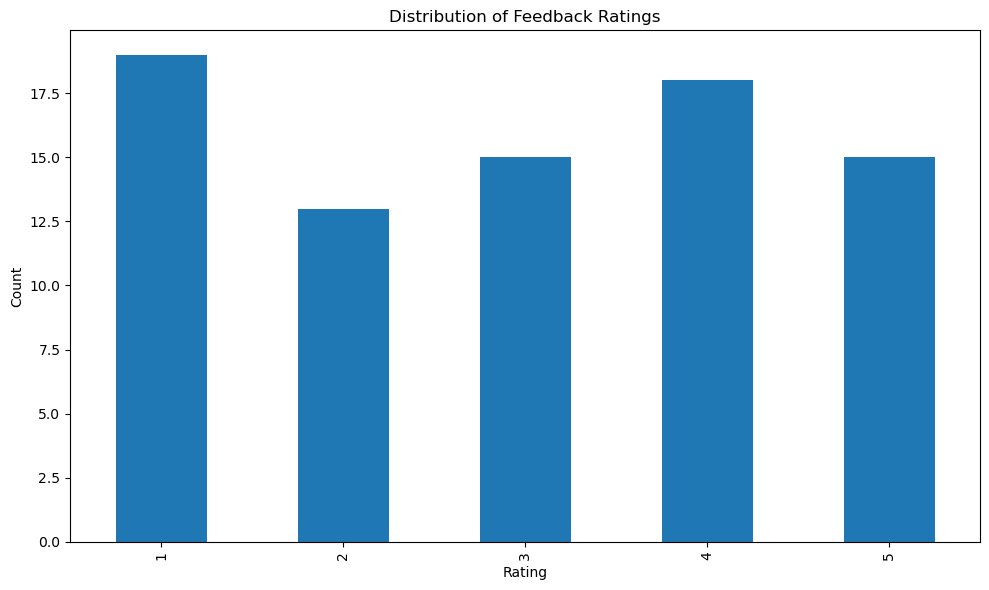

In [18]:
plt.figure(figsize=(10, 6))
feedback_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Feedback Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()


Feedback Text Categories:
Feedback_Text
Too fast-paced          15
Needs improvement       13
Loved the examples      10
Well structured         10
Could be better          9
Very helpful             9
Excellent instructor     7
Great course!            7
Name: count, dtype: int64


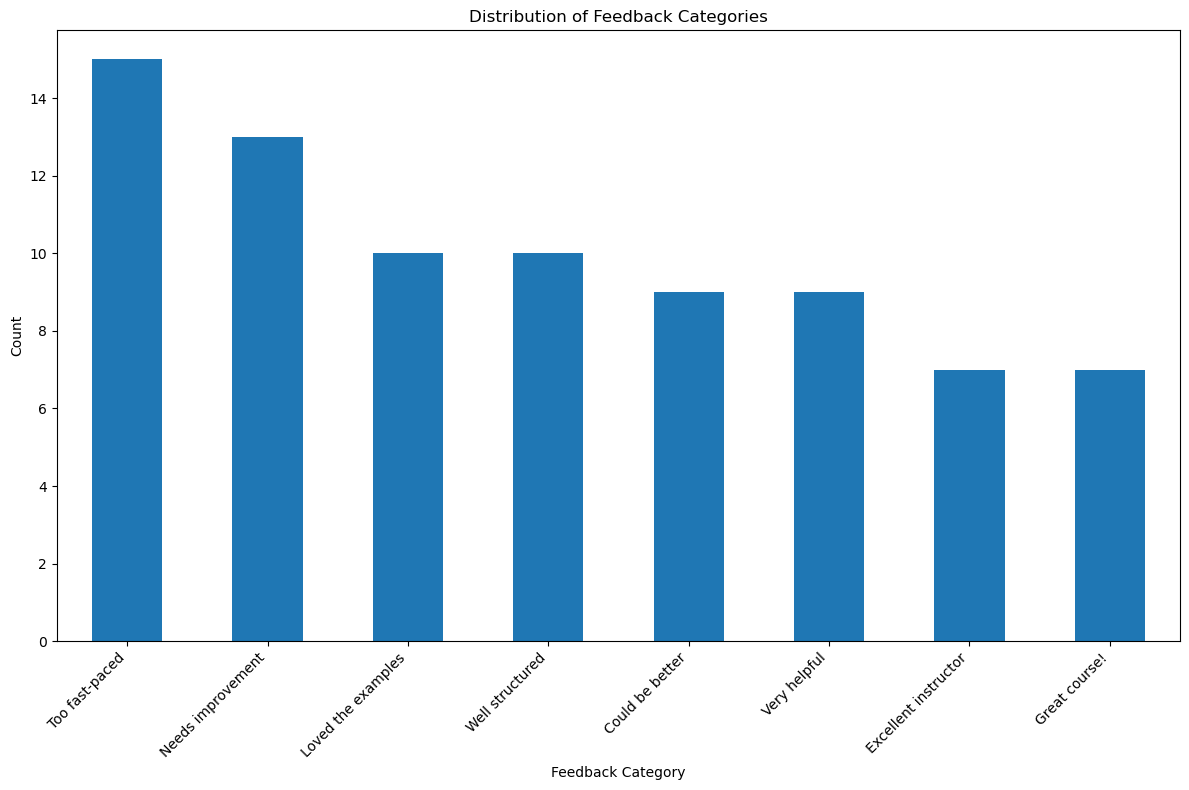

In [19]:
feedback_categories = feedback_df['Feedback_Text'].value_counts()
print("\nFeedback Text Categories:")
print(feedback_categories)

plt.figure(figsize=(12, 8))
feedback_categories.plot(kind='bar')
plt.title('Distribution of Feedback Categories')
plt.xlabel('Feedback Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [20]:
student_ids = students_df['Student_ID'].unique()
course_ids = ['PY202', 'DM101', 'UX303', 'WD404']
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-03-31')
date_range = pd.date_range(start=start_date, end=end_date)
np.random.seed(42)  # For reproducibility
records = []
for student_id in student_ids:
    # Each student takes 1-4 courses
    num_courses = np.random.randint(1, 5)
    selected_courses = np.random.choice(course_ids, size=num_courses, replace=False)
    
    for course_id in selected_courses:
        # Each student has 3-10 activity records per course
        num_activities = np.random.randint(3, 11)
        
        for _ in range(num_activities):
            date = np.random.choice(date_range)
            time_spent = np.random.randint(10, 180)  # 10-180 minutes
            completion = np.random.uniform(0, 100)  # 0-100% completion
            
            records.append({
                'Student_ID': student_id,
                'Course_ID': course_id,
                'Date': date,
                'Time_Spent_Minutes': time_spent,
                'Completion_Percentage': round(completion, 2)
            })

course_activity_df = pd.DataFrame(records)

2. Exploratory Data Analysis
This section explores key metrics and patterns in student engagement:
- Course completion rates
- Engagement time analysis
- Demographic differences in engagement
- Feedback patterns and correlations


What is the overall average completion rate across courses?



In [22]:
overall_avg = course_activity_df["Completion_Percentage"].mean()
print(f"Overall avg completion: {overall_avg:.2f}%")

Overall avg completion: 50.22%


In [23]:
overall_median = course_activity_df["Completion_Percentage"].median()
print(f"Overall completion – median: {overall_median:.2f} %")

Overall completion – median: 49.19 %


In [24]:
avg_completion = course_activity_df.groupby('Student_ID')['Completion_Percentage'].max().mean()
print(f"average completion rate: {avg_completion:.2f}%")

average completion rate: 92.72%


Which course has the highest and lowest average engagement time?

In [25]:

avg_time_by_course = course_activity_df.groupby('Course_ID')['Time_Spent_Minutes'] \
                                      .mean()

highest_course = avg_time_by_course.idxmax()
highest_value  = avg_time_by_course.max()

lowest_course  = avg_time_by_course.idxmin()
lowest_value   = avg_time_by_course.min()

print(f"Highest average engagement:  {highest_course} — {highest_value:.2f} minutes")
print(f"Lowest  average engagement:  {lowest_course} —  {lowest_value:.2f} minutes")

Highest average engagement:  DM101 — 97.69 minutes
Lowest  average engagement:  UX303 —  94.56 minutes


In [26]:
students_df['Age_Group'] = pd.cut(students_df['Age'], bins=[17, 22, 27, 32, 35], 
                                 labels=['18-22', '23-27', '28-32', '33-35'])

# Merge students with activity
student_activity = pd.merge(course_activity_df, students_df, on='Student_ID')

# Engagement by age group
engagement_by_age = student_activity.groupby('Age_Group', observed=True)['Time_Spent_Minutes'].mean().sort_values()
print("\nAverage engagement time by age group (minutes):")
print(engagement_by_age)


Average engagement time by age group (minutes):
Age_Group
33-35    89.955357
23-27    93.834409
18-22    96.728070
28-32    99.065076
Name: Time_Spent_Minutes, dtype: float64


In [27]:
engagement_by_location = student_activity.groupby('Location')['Time_Spent_Minutes'].mean().sort_values()
print("\nAverage engagement time by location (minutes):")
print(engagement_by_location)


Average engagement time by location (minutes):
Location
Bangalore    93.518414
Mumbai       95.608040
Chennai      96.042793
Delhi        97.376238
Kolkata      98.514423
Name: Time_Spent_Minutes, dtype: float64


In [28]:
avg_rating_by_course = feedback_df.groupby('Course_ID')['Rating'].mean().sort_values()
print("\nAverage feedback rating by course (1-5 scale):")
print(avg_rating_by_course)


Average feedback rating by course (1-5 scale):
Course_ID
WD404    2.789474
DM101    2.900000
UX303    2.923077
PY202    3.277778
Name: Rating, dtype: float64


Is there a correlation between completion rate and feedback rating?

In [29]:
max_completion = course_activity_df.groupby(['Student_ID', 'Course_ID'])['Completion_Percentage'].max().reset_index()

completion_feedback = pd.merge(max_completion, feedback_df, on=['Student_ID', 'Course_ID'])

corr = completion_feedback['Completion_Percentage'].corr(completion_feedback['Rating'])
print(f"\nCorrelation between completion rate and feedback rating: {corr:.2f}")


Correlation between completion rate and feedback rating: -0.04


Identify top 3 student segments based on engagement and satisfaction.

In [46]:
student_metrics = course_activity_df.groupby('Student_ID').agg({
    'Time_Spent_Minutes': 'sum',
    'Completion_Percentage': 'mean'
}).reset_index()

student_satisfaction = feedback_df.groupby('Student_ID')['Rating'].mean().reset_index()
student_segments = pd.merge(student_metrics, student_satisfaction, on='Student_ID')

student_segments['Time_Norm'] = (student_segments['Time_Spent_Minutes'] - student_segments['Time_Spent_Minutes'].min()) / \
                             (student_segments['Time_Spent_Minutes'].max() - student_segments['Time_Spent_Minutes'].min())
student_segments['Completion_Norm'] = student_segments['Completion_Percentage'] / 100
student_segments['Rating_Norm'] = student_segments['Rating'] / 5

student_segments['Engagement_Score'] = 0.5 * student_segments['Time_Norm'] + 0.5 * student_segments['Completion_Norm']
student_segments['Overall_Score'] = 0.6 * student_segments['Engagement_Score'] + 0.4 * student_segments['Rating_Norm']

top_segments = student_segments.sort_values('Overall_Score', ascending=False).head(3)
print("\nTop 3 student segments based on engagement and satisfaction:")
print(top_segments[['Student_ID', 'Time_Spent_Minutes', 'Completion_Percentage', 'Rating', 'Overall_Score']])


Top 3 student segments based on engagement and satisfaction:
   Student_ID  Time_Spent_Minutes  Completion_Percentage  Rating  \
23       S036                2656              57.592500     5.0   
78       S099                3008              44.092667     5.0   
2        S005                3236              57.726897     4.0   

    Overall_Score  
23       0.799837  
78       0.791920  
2        0.773927  


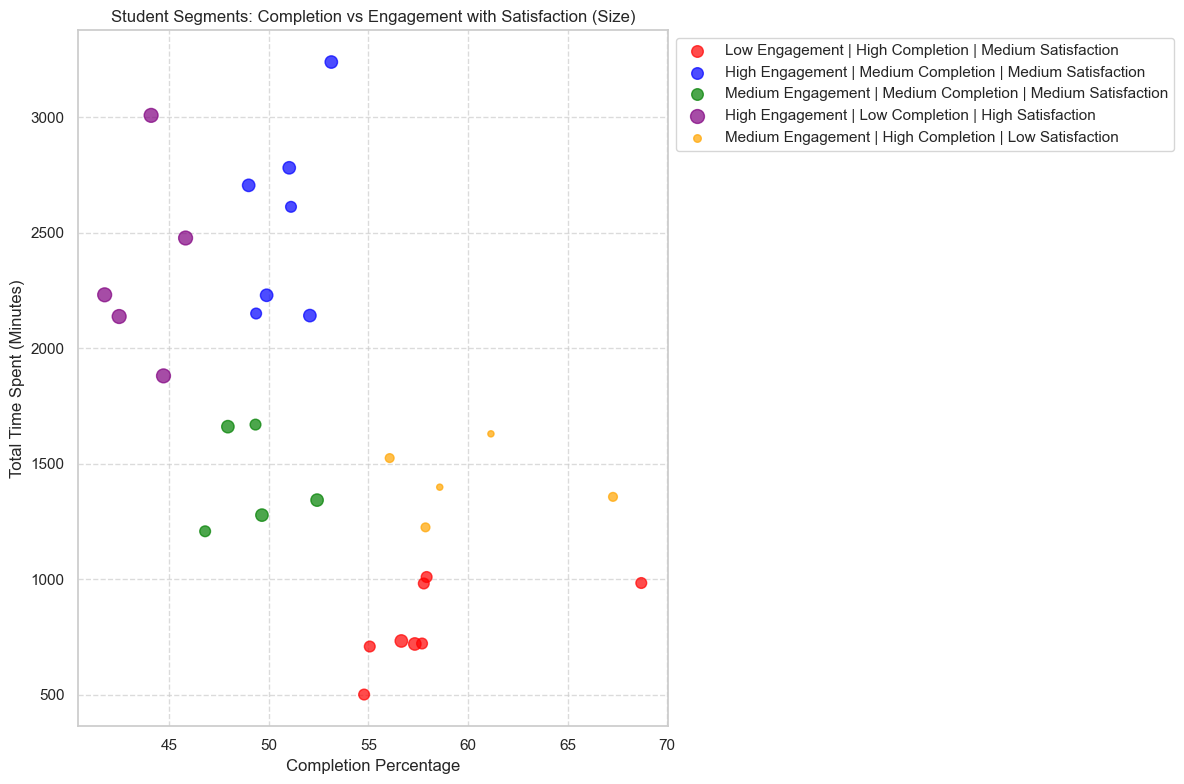

In [41]:
# Create a scatter plot of the top segments
plt.figure(figsize=(12, 8))
top_segment_names = top_segments.index

# Create a color map for the segments
colors = ['red', 'blue', 'green', 'purple', 'orange']
segment_color_map = {segment: color for segment, color in zip(top_segment_names, colors)}

# Plot each segment with a different color
for segment, color in segment_color_map.items():
    subset = student_segments[student_segments['Segment'] == segment]
    plt.scatter(
        subset['Completion_Percentage'], 
        subset['Time_Spent_Minutes'],
        s=subset['Rating']*20,  # Size based on rating
        color=color,
        alpha=0.7,
        label=segment
    )

plt.title('Student Segments: Completion vs Engagement with Satisfaction (Size)')
plt.xlabel('Completion Percentage')
plt.ylabel('Total Time Spent (Minutes)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('student_segments.png')
plt.show()

3. Visualizations

The following visualizations help uncover patterns in student engagement:
- Engagement by course and demographic
- Feedback distribution analysis
- Time-based trend analysis

Show engagement patterns by course and demographic

(array([0, 1, 2, 3]),
 [Text(0, 0, 'DM101'),
  Text(1, 0, 'PY202'),
  Text(2, 0, 'UX303'),
  Text(3, 0, 'WD404')])

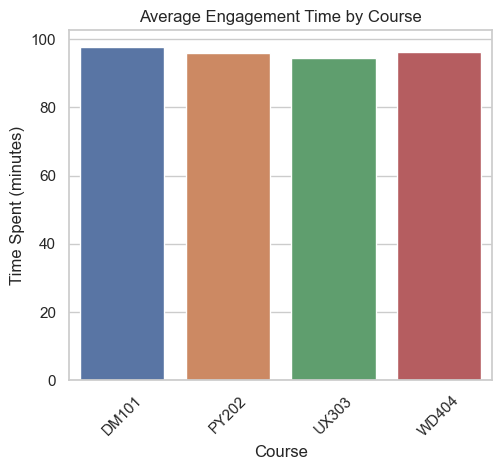

In [32]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=avg_time_by_course.index, y=avg_time_by_course.values)
plt.title('Average Engagement Time by Course')
plt.xlabel('Course')
plt.ylabel('Time Spent (minutes)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'WD404'),
  Text(1, 0, 'DM101'),
  Text(2, 0, 'UX303'),
  Text(3, 0, 'PY202')])

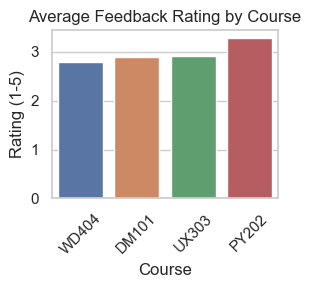

In [33]:
plt.subplot(2, 2, 2)
sns.barplot(x=avg_rating_by_course.index, y=avg_rating_by_course.values)
plt.title('Average Feedback Rating by Course')
plt.xlabel('Course')
plt.ylabel('Rating (1-5)')
plt.xticks(rotation=45)

Text(0, 0.5, 'Rating (1-5)')

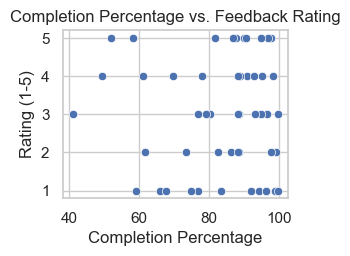

In [34]:
plt.subplot(2, 2, 3)
sns.scatterplot(data=completion_feedback, x='Completion_Percentage', y='Rating')
plt.title('Completion Percentage vs. Feedback Rating')
plt.xlabel('Completion Percentage')
plt.ylabel('Rating (1-5)')

How does engagement differ by age group or location?

Average engagement time by age group (mins):
 Age_Group
≤22      96.7
23–27    93.8
28–32    99.1
33+      90.0
Name: Time_Spent_Minutes, dtype: float64 

Average engagement time by location (mins):
 Location
Kolkata      98.5
Delhi        97.4
Chennai      96.0
Mumbai       95.6
Bangalore    93.5
Name: Time_Spent_Minutes, dtype: float64


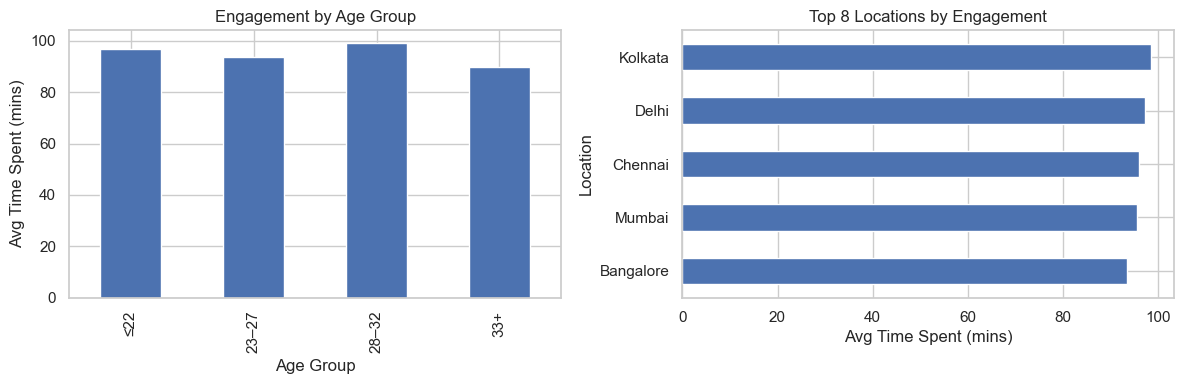

In [35]:
bins = [0, 22, 27, 32, 100]
labels = ['≤22','23–27','28–32','33+']
students_df['Age_Group'] = pd.cut(students_df['Age'], bins=bins, labels=labels, right=True)

sa = course_activity_df.merge(
    students_df[['Student_ID','Age_Group','Location']],
    on='Student_ID', how='left'
)

eng_by_age = sa.groupby('Age_Group', observed=True)['Time_Spent_Minutes'] \
               .mean() \
               .round(1) \
               .sort_index()

eng_by_loc = sa.groupby('Location')['Time_Spent_Minutes'] \
               .mean() \
               .round(1) \
               .sort_values(ascending=False)

print("Average engagement time by age group (mins):\n", eng_by_age, "\n")
print("Average engagement time by location (mins):\n", eng_by_loc.head(10))


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
eng_by_age.plot(kind='bar')
plt.title('Engagement by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Time Spent (mins)')

plt.subplot(1,2,2)
eng_by_loc.head(8).plot(kind='barh')
plt.title('Top 8 Locations by Engagement')
plt.xlabel('Avg Time Spent (mins)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Show engagement patterns by course and demographic

In [36]:
eng_summary = (
    avg_time_by_course                      
    .reset_index()
    .rename(columns={"Time_Spent_Minutes": "Avg_Time_Minutes"})
    .sort_values("Avg_Time_Minutes", ascending=False)
)
print("\nAverage engagement time by course")
display(eng_summary)  


Average engagement time by course


,Course_ID,Avg_Time_Minutes
0,DM101,97.688525
3,WD404,96.206704
1,PY202,95.821176
2,UX303,94.555276


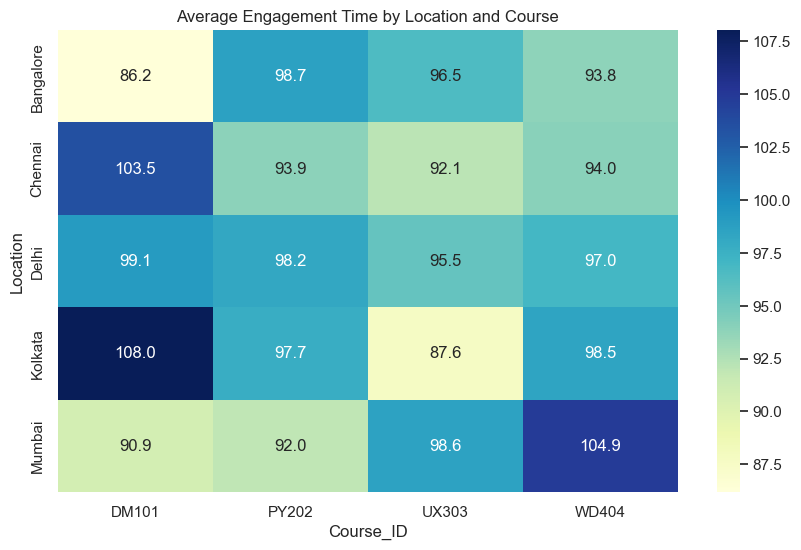

In [37]:
plt.figure(figsize=(10, 6))
engagement_heatmap = student_activity.groupby(['Location', 'Course_ID'])['Time_Spent_Minutes'].mean().unstack()
sns.heatmap(engagement_heatmap, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Engagement Time by Location and Course')
plt.savefig('engagement_heatmap.png')

Highlight trends over time


<Figure size 1200x600 with 0 Axes>

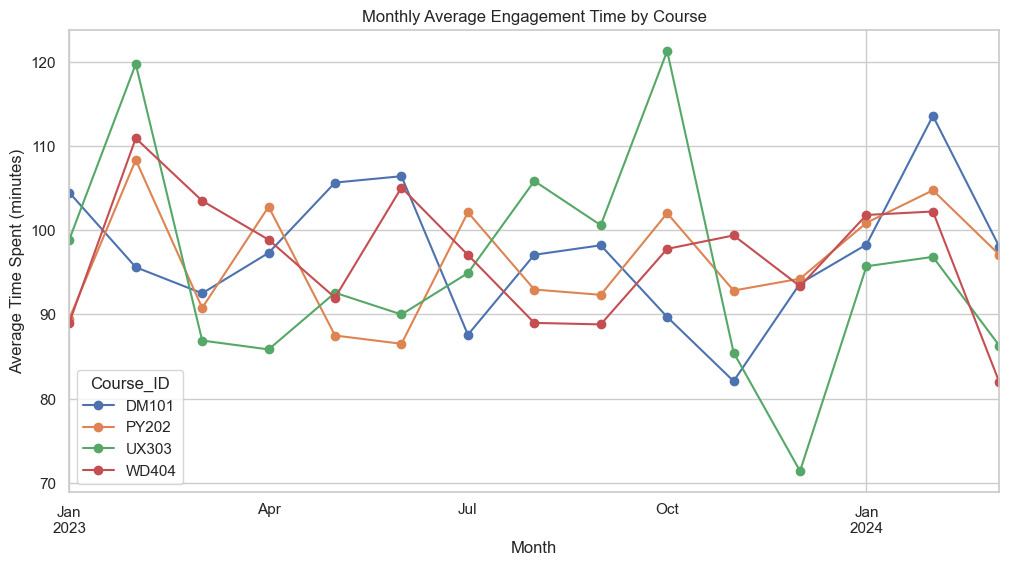

In [38]:
plt.figure(figsize=(12, 6))
course_activity_df['Month'] = course_activity_df['Date'].dt.to_period('M')
monthly_engagement = course_activity_df.groupby(['Month', 'Course_ID'])['Time_Spent_Minutes'].mean().unstack()
monthly_engagement.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Average Engagement Time by Course')
plt.xlabel('Month')
plt.ylabel('Average Time Spent (minutes)')
plt.grid(True)
plt.savefig('engagement_trend.png')

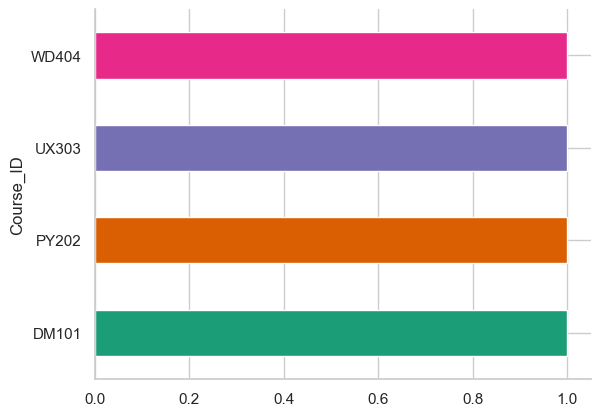

In [39]:
eng_summary.groupby('Course_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)